In [ ]:
# pytorch-geometric

In [1]:
import networkx as nx
H = nx.DiGraph()

In [18]:
H.add_nodes_from([
  (0, {"color": "gray", "size": 450}),
  (1, {"color": "black", "size": 700}),
  (2, {"color": "gray", "size": 250}),
  (3, {"color": "gray", "size": 500})
])

In [19]:
for node in H.nodes(data=True):
  print(node)

(0, {'color': 'gray', 'size': 450})
(1, {'color': 'black', 'size': 700})
(2, {'color': 'gray', 'size': 250})
(3, {'color': 'gray', 'size': 500})


In [20]:
H.add_edges_from([
  (0, 1),
  (1, 2),
  (2, 0),
  (2, 3),
  (3, 2)
])
print(H.edges())

[(0, 1), (1, 2), (2, 0), (2, 3), (3, 2)]


In [ ]:
def print_graph_info(graph):
  print("Directed graph:", graph.is_directed())
  print("Number of nodes:", graph.number_of_nodes())
  print("Number of edges:", graph.number_of_edges())
print_graph_info(H)


In [22]:
node_colors = nx.get_node_attributes(H, "color").values()
colors = list(node_colors)

In [23]:
node_sizes = nx.get_node_attributes(H, "size").values()
sizes = list(node_sizes)

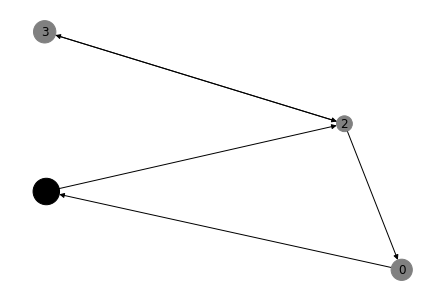

In [24]:
nx.draw(H, with_labels=True, node_color=colors, node_size=sizes)

In [25]:
G = H.to_undirected()
print_graph_info(G)

Directed graph: False
Number of nodes: 4
Number of edges: 4


In [26]:
print(G.edges())

[(0, 1), (0, 2), (1, 2), (2, 3)]


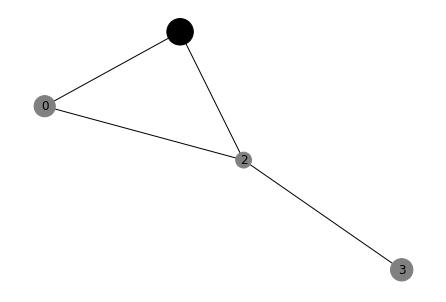

In [27]:
nx.draw(G, with_labels=True, node_color=colors, node_size=sizes)

In [30]:
pip install torch_geometric

     |████████████████████████████████| 407 kB 6.9 MB/s 
  Created wheel for torch-geometric: filename=torch_geometric-2.0.4-py3-none-any.whl size=616603 sha256=2ff3d1717e8011ccad285d6917920039e54eed309897fcd056b70f7c4c35d1fa
  Stored in directory: /root/.cache/pip/wheels/18/a6/a4/ca18c3051fcead866fe7b85700ee2240d883562a1bc70ce421
Successfully built torch-geometric


In [34]:
import torch

# load graph from networkx library
G = nx.karate_club_graph()

In [40]:
pip install torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}+${CUDA}.html

Looking in links: https://data.pyg.org/whl/torch-+.html
  Created wheel for torch-scatter: filename=torch_scatter-2.0.9-cp37-cp37m-linux_x86_64.whl size=282116 sha256=22fcd356e9a68de15ba80752b078ff7a9fe1caf2941ea12d32f58559ff4eac0a
  Stored in directory: /root/.cache/pip/wheels/dd/57/a3/42ea193b77378ce634eb9454c9bc1e3163f3b482a35cdee4d1
Successfully built torch-scatter


In [41]:
pip install torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}+${CUDA}.html

Looking in links: https://data.pyg.org/whl/torch-+.html
     |████████████████████████████████| 48 kB 4.0 MB/s 
  Created wheel for torch-sparse: filename=torch_sparse-0.6.13-cp37-cp37m-linux_x86_64.whl size=510031 sha256=211ac91a7a0823568de7ca4ab6ecf916921235f9dab6fbe7ab27496339235e40
  Stored in directory: /root/.cache/pip/wheels/e0/01/be/6b2966e0ff20bb023ae35e5d17903e6e5b4df46dd5892f6be6
Successfully built torch-sparse


In [42]:
pip install torch-geometric

In [43]:
pip install torch-cluster -f https://data.pyg.org/whl/torch-${TORCH}+${CUDA}.html

Looking in links: https://data.pyg.org/whl/torch-+.html
     |████████████████████████████████| 43 kB 1.2 MB/s 
  Created wheel for torch-cluster: filename=torch_cluster-1.6.0-cp37-cp37m-linux_x86_64.whl size=325743 sha256=8dc0c9c98fde7173cce4c98b4be0a3a09462cb3e9bca1047e917195499f38433
  Stored in directory: /root/.cache/pip/wheels/bc/c7/3e/258dd72b35d7a459264143ad5bfe97b9dc5eef90069ca2f13f
Successfully built torch-cluster


In [48]:
pip install torch-spline-conv -f https://data.pyg.org/whl/torch-${TORCH}+${CUDA}.html

Looking in links: https://data.pyg.org/whl/torch-+.html
  Created wheel for torch-spline-conv: filename=torch_spline_conv-1.2.1-cp37-cp37m-linux_x86_64.whl size=133840 sha256=3b9a9a044dba16816b6c8df039a562fae1529f2bc3af7a6bb6f18d324f7f55c6
  Stored in directory: /root/.cache/pip/wheels/9c/33/73/780370b7c7bdf2340c0a7b971e915643f14795b4caa7a9a31f
Successfully built torch-spline-conv


In [44]:
import torch_geometric.transforms as T

In [45]:
import torch.nn as nn

In [46]:
import torch.nn.functional as F

In [47]:
from torch_geometric.nn import GCNConv

In [50]:
from torch_geometric.datasets import KarateClub

In [51]:
dataset = KarateClub()
print("Dataset:", dataset)
print("# Graphs:", len(dataset))
print("# Features:", dataset.num_features)
print("# Classes:", dataset.num_classes)

Dataset: KarateClub()
# Graphs: 1
# Features: 34
# Classes: 4


In [52]:
data = dataset[0]
print(data)
print("Training nodes:", data.train_mask.sum().item())
print("Is directed:", data.is_directed())

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])
Training nodes: 4
Is directed: False


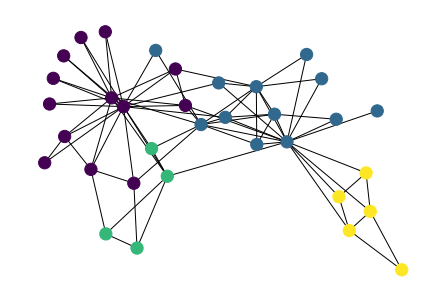

In [53]:
from torch_geometric.utils import to_networkx
G = to_networkx(data, to_undirected=True)
nx.draw(G, node_color=data.y, node_size=150)

In [54]:
from torch.nn import Linear
from torch_geometric.nn import GCNConv

In [55]:
class GCN(torch.nn.Module):
  def __init__(self):
    super(GCN, self).__init__()
    torch.manual_seed(42)
    self.conv1 = GCNConv(dataset.num_features, 4)
    self.conv2 = GCNConv(4, 4)
    self.conv3 = GCNConv(4, 2)
    self.classifier = Linear(2, dataset.num_classes)
  def forward(self, x, edge_index):
    h = self.conv1(x, edge_index)
    h = h.tanh()
    h = self.conv2(h, edge_index)
    h = h.tanh()
    h = self.conv3(h, edge_index)
    h = h.tanh()
    out = self.classifier(h)
    return out, h
model = GCN()
print(model)

GCN(
  (conv1): GCNConv(34, 4)
  (conv2): GCNConv(4, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)


In [56]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
def train(data):
  optimizer.zero_grad()
  out, h = model(data.x, data.edge_index)
  loss = criterion(out[data.train_mask], data.y[data.train_mask])
  loss.backward()
  optimizer.step()
  return loss, h
epochs = range(1, 301)
losses = []
embeddings = []
for epoch in epochs:
  loss, h = train(data)
  losses.append(loss)
  embeddings.append(h)
  print(f"Epoch: {epoch}\tLoss: {loss:.4f}")

Epoch: 1	Loss: 1.3996
Epoch: 2	Loss: 1.3749
Epoch: 3	Loss: 1.3545
Epoch: 4	Loss: 1.3380
Epoch: 5	Loss: 1.3248
Epoch: 6	Loss: 1.3137
Epoch: 7	Loss: 1.3034
Epoch: 8	Loss: 1.2929
Epoch: 9	Loss: 1.2814
Epoch: 10	Loss: 1.2689
Epoch: 11	Loss: 1.2553
Epoch: 12	Loss: 1.2410
Epoch: 13	Loss: 1.2264
Epoch: 14	Loss: 1.2117
Epoch: 15	Loss: 1.1971
Epoch: 16	Loss: 1.1827
Epoch: 17	Loss: 1.1682
Epoch: 18	Loss: 1.1534
Epoch: 19	Loss: 1.1382
Epoch: 20	Loss: 1.1224
Epoch: 21	Loss: 1.1060
Epoch: 22	Loss: 1.0895
Epoch: 23	Loss: 1.0730
Epoch: 24	Loss: 1.0569
Epoch: 25	Loss: 1.0412
Epoch: 26	Loss: 1.0259
Epoch: 27	Loss: 1.0108
Epoch: 28	Loss: 0.9960
Epoch: 29	Loss: 0.9816
Epoch: 30	Loss: 0.9677
Epoch: 31	Loss: 0.9545
Epoch: 32	Loss: 0.9420
Epoch: 33	Loss: 0.9302
Epoch: 34	Loss: 0.9189
Epoch: 35	Loss: 0.9080
Epoch: 36	Loss: 0.8976
Epoch: 37	Loss: 0.8876
Epoch: 38	Loss: 0.8781
Epoch: 39	Loss: 0.8690
Epoch: 40	Loss: 0.8601
Epoch: 41	Loss: 0.8515
Epoch: 42	Loss: 0.8430
Epoch: 43	Loss: 0.8347
Epoch: 44	Loss: 0.82

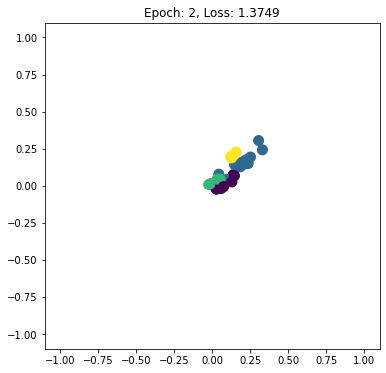

In [ ]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt

def animate(i):
  ax.clear()
  h = embeddings[i]
  h = h.detach().numpy()
  ax.scatter(h[:, 0], h[:, 1], c=data.y, s=100)
  ax.set_title(f'Epoch: {epochs[i]}, Loss: {losses[i].item():.4f}')
  ax.set_xlim([-1.1, 1.1])
  ax.set_ylim([-1.1, 1.1])

fig = plt.figure(figsize=(6, 6))
ax = plt.axes()
anim = animation.FuncAnimation(fig, animate, frames=epochs)
plt.show()

gif_writer = animation.PillowWriter(fps=20)
anim.save('embeddings.gif', writer=gif_writer)

In [ ]:
# https://towardsdatascience.com/a-beginners-guide-to-graph-neural-networks-using-pytorch-geometric-part-2-cd82c01330ab
# https://towardsdatascience.com/graph-neural-networks-in-python-c310c7c18c83
# https://pytorch-geometric.readthedocs.io/en/latest/notes/installation.html
# https://medium.com/@rohithtejam/a-beginners-guide-to-graph-neural-networks-using-pytorch-geometric-part-1-d98dc93e7742

